## 1. K-means clustering of image pixels

In this question, we will replicate the image pixels K-means clustering example in our lectures note. Perform the following:


- Perform k-means with k=2,5,10,30,100k=2,5,10,30,100 by treating the pixels as observations. 
- For each k setting, after obtaining the clusters, reconstruct a new image that replaces the pixel colors in each cluster by its cluster mean color. 
- Plot these six new images to organize your 6 new figures with two rows of three images per row. Label each figure with their corresponding kk.



In [2]:
from PIL import Image

# Convert the PNG image to JPG format
input_path = '/Users/colleenjung/Desktop/UChicago/Notion_EDA/minions.png'
image_path = '/Users/colleenjung/Desktop/UChicago/Notion_EDA/minions.jpg'

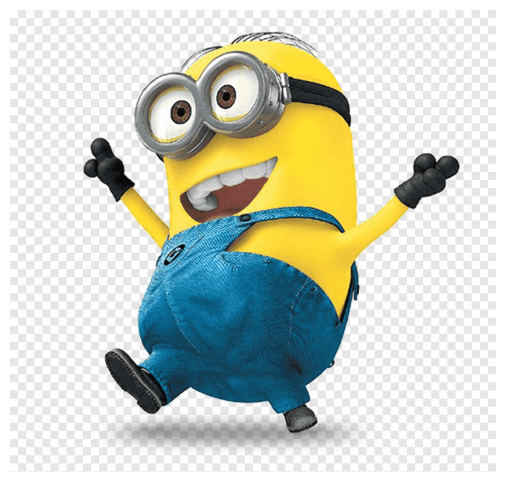

In [6]:
from matplotlib import pyplot as plt
from matplotlib.image import imread

img = imread("/Users/colleenjung/Desktop/UChicago/Notion_EDA/minions.png")

# Get the dimensions of the image
img_dim = img.shape

# Plot the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

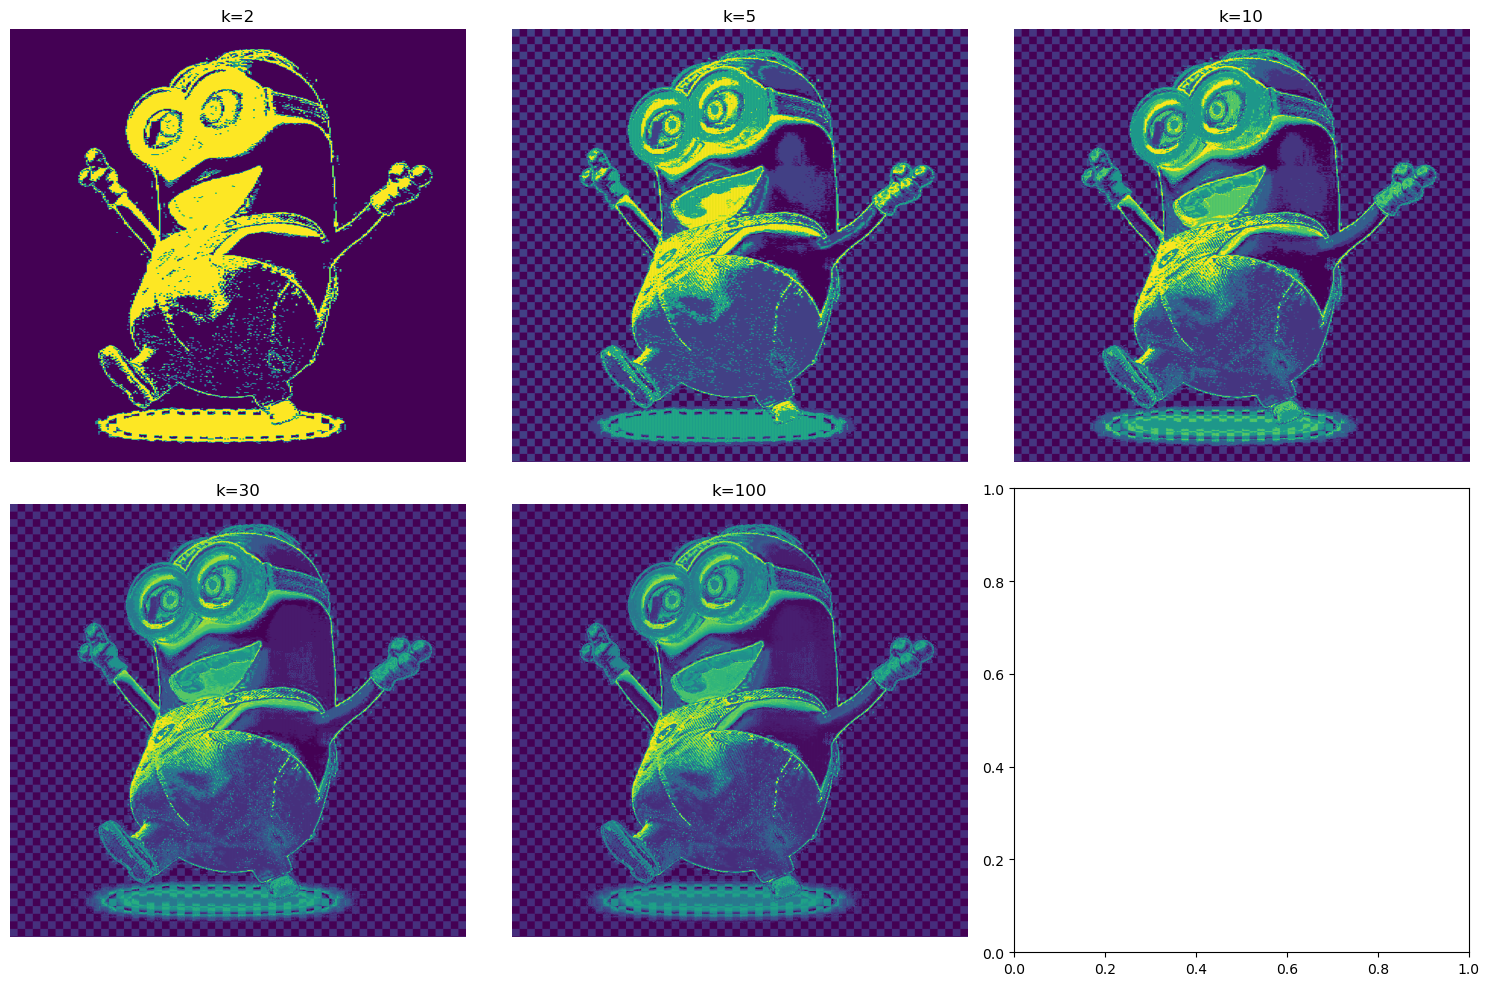

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

# Function to perform k-means clustering on image pixels
def kmeans_image_clustering(image_path, k_values):
    # Load the image
    image = Image.open(image_path)
    # Convert image to numpy array and normalize
    img_np = np.array(image) / 255

    # Reshape the image array into a "number of pixels x 3" matrix
    pixel_matrix = img_np.reshape(-1, 3)

    # Set up the matplotlib figure and axes
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.ravel()

    for i, k in enumerate(k_values):
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=0).fit(pixel_matrix)
        # Replace pixel colors with their respective cluster centers
        compressed_pixel_matrix = kmeans.cluster_centers_[kmeans.labels_]
        # Reshape the compressed pixel matrix back to the image dimensions
        compressed_img = compressed_pixel_matrix.reshape(img_np.shape)

        # Plotting the compressed image
        axs[i].imshow(compressed_img)
        axs[i].set_title(f'k={k}')
        axs[i].axis('off')

    # Adjust layout to be tight and show the plot
    plt.tight_layout()
    plt.show()

# Path to a local image file (Please replace this with your own image path)
image_path = '/Users/colleenjung/Desktop/UChicago/Notion_EDA/minions.png'
# List of k values to try
k_values = [2, 5, 10, 30, 100]

# Perform k-means clustering and plot the images
kmeans_image_clustering(image_path, k_values)


## 2. Hierarchical Clustering for Breast Cancer
We use the Breast Cancer data from [Kaggle] (https://www.kaggle.com/code/jwlzdh1/classifying-predicting-breast-cancer-tumors/data?select=BCGENES.csv). Download the BCGENES.csv file.

load data, exclude the idx column
cancer = read.csv("BCGENES.csv")[, -1]
The first column of this dataset is PAM50 mRNA, the cancer type. You need to use the other columns as covariates and perform hierarchical clustering.

a. Before clustering, let’s explore the data by PCA. Perform the following 
- Scale and center the data.
- Perform PCA and plot a scatter plot using the first 2 PCs. Color each point by their true cancer type with proper coloring and legend. Does this 2-dimensional plot show clustering pattern? Describe the pattern.
- Provide a plot of “variance explained” plot of your PCA analysis. -- - Based on the results, if you are asked to select a number of PCs to represent this data, how many PCs would you persevere? Provide explanations for your choice.



In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix

In [10]:
cancer= pd.read_csv('/Users/colleenjung/Desktop/UChicago/Notion_EDA/BCGENES.csv').iloc[:,1:]

In [11]:
#Extract labels for coloring in PCA scatter plot
true_labels = cancer['PAM50 mRNA']
# Drop the 'PAM50 mRNA' column as it's the label, not a feature
cancer_data = cancer.drop(columns=['PAM50 mRNA'])

In [12]:
#Scaling
scaler=StandardScaler()
cancer_scaled=scaler.fit_transform(cancer_data)

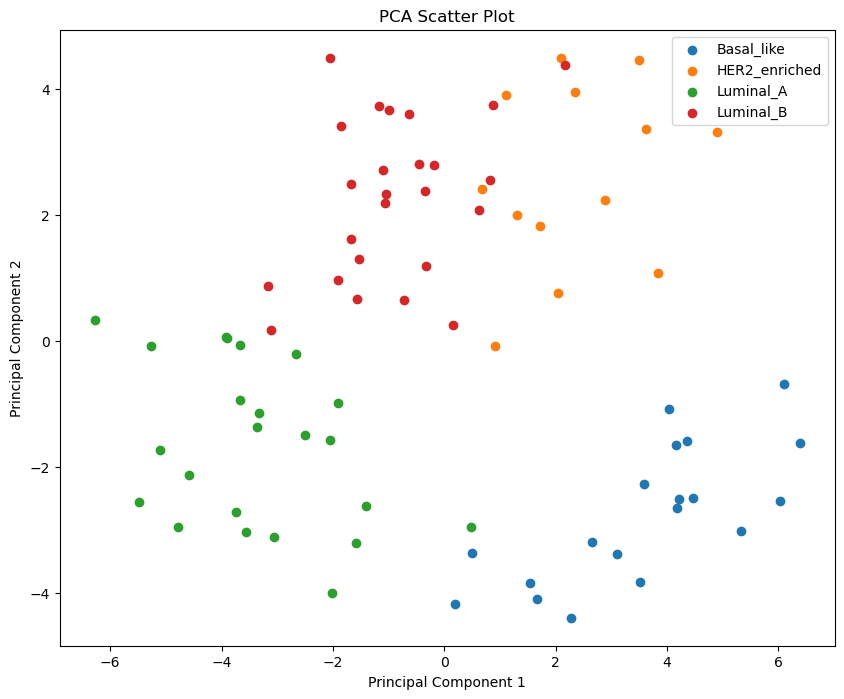

In [14]:
#PCA
pca=PCA()
cancer_pca=pca.fit_transform(cancer_scaled)

# Scatter plot for the first two PCs
plt.figure(figsize=(10, 8))
for label in np.unique(true_labels):
    plt.scatter(cancer_pca[true_labels == label, 0], cancer_pca[true_labels == label, 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend()
plt.show()

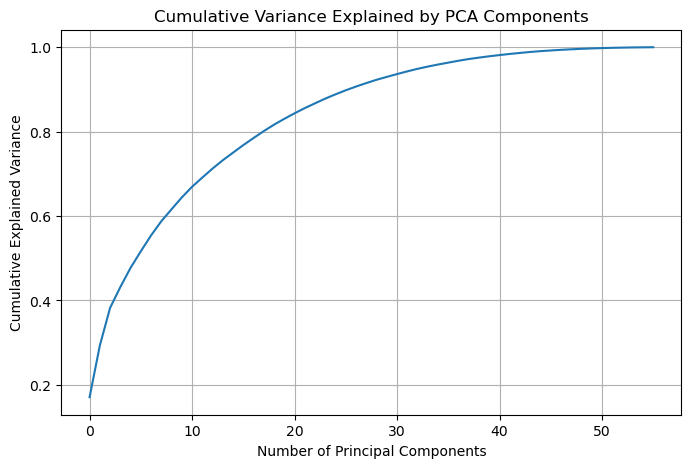

In [16]:
# Plot the cumulative variance explained by the principal components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.grid(True)
plt.show()

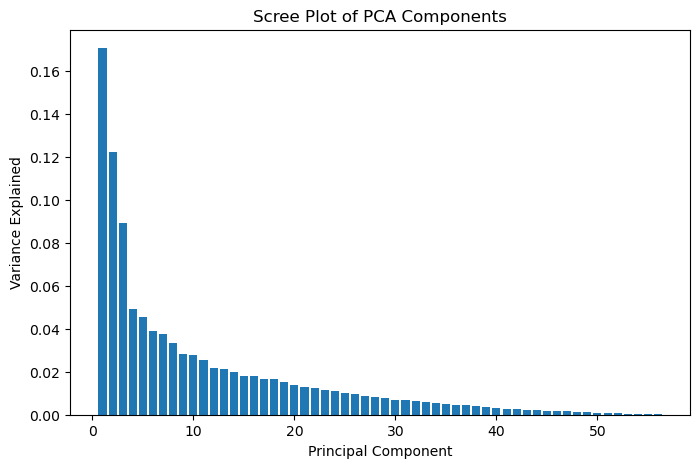

In [17]:
# Plot the scree plot of the principal components
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot of PCA Components')
plt.show()

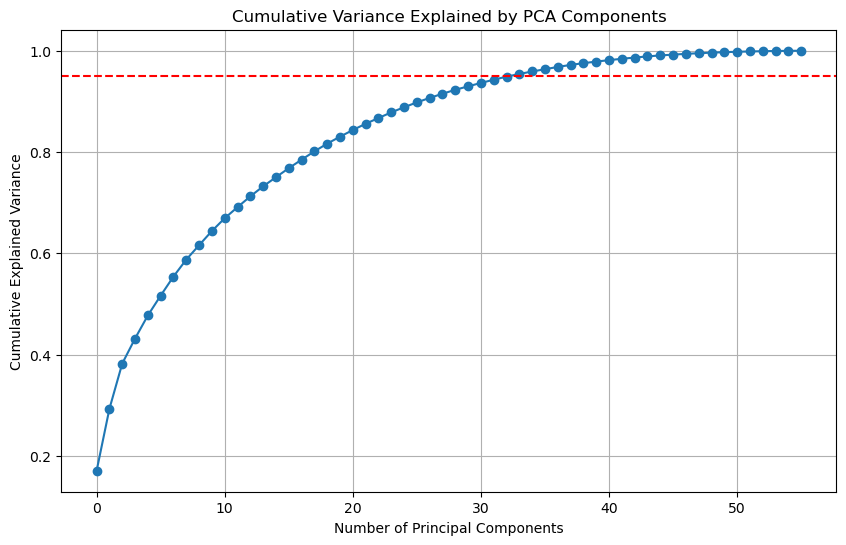

(34, 0.9541146168282788)

In [18]:
# Re-importing numpy since the environment was reset
import numpy as np

# Re-perform PCA since the state was reset
pca = PCA().fit(cancer_scaled)

# Plot the cumulative variance explained by the principal components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # Line for 95% explained variance
plt.show()

# Determine the number of PCs to preserve based on explained variance
# Here, we choose 95% as our threshold
threshold = 0.95
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= threshold) + 1

# Display the number of PCs that explain at least 95% of the variance
num_components_preserved = num_components
variance_explained = cumulative_variance[num_components-1]

num_components_preserved, variance_explained


In [19]:
# Number of principal components to inspect
num_top_components = 5  # For example, look at the top 5 components

# Get the loadings of the original features on the principal components
loadings = pca.components_

# Get the feature names from the dataset
feature_names = cancer_data.columns

# Identify the most important features for each of the top principal components
for i in range(num_top_components):
    component_loadings = loadings[i]
    sorted_idx = np.argsort(np.abs(component_loadings))[::-1]
    top_features = feature_names[sorted_idx[:num_components_preserved]]
    print(f"Principal Component {i+1} has top contributing features: {top_features.values}")


Principal Component 1 has top contributing features: ['TBC1 domain family member 9'
 'trans-acting T-cell-specific transcription factor GATA-3 isoform 1'
 'transcription elongation factor A protein-like 5'
 'UPF0553 protein C9orf64' 'probable ATP-dependent RNA helicase DDX6'
 "5'-nucleotidase domain-containing protein 2 isoform 1"
 'hepatocyte nuclear factor 3-gamma' 'MICAL-like protein 1'
 'protein LSM14 homolog B' 'ubiquitin-conjugating enzyme E2 E3'
 'heat shock protein HSP 90-beta isoform a'
 'epidermal growth factor receptor isoform a precursor'
 'signal transducer and activator of transcription 6 isoform 1'
 'L-lactate dehydrogenase B chain'
 'UTP--glucose-1-phosphate uridylyltransferase isoform a'
 'keratin, type I cytoskeletal 23' 'PREDICTED: myomegalin-like'
 'myoferlin isoform a' 'dedicator of cytokinesis protein 1'
 'arfaptin-1 isoform 2' 'protein S100-A13'
 'transmembrane protein 132A isoform a precursor'
 '1-phosphatidylinositol 4,5-bisphosphate phosphodiesterase beta-3 is

The principal components (PCs) obtained from PCA are not the original columns or features from your dataset; they are new features constructed as linear combinations of the original features.

b. Use all scaled covariates except the labelPAM50 mRNA for the hierarchical clustering. Try different linkages function: complete, single and average linkage. 

- Based on your results, provide the hierarchical tree structure plot of your clustering analysis for each linkage choice. Label them properly.

- Set cutoff to get 4 clusters of each method. You may use cutreee function. Present the “confusion table” against the true cancer type. Note that this is an unsupervised learning problem so you do not know the true labels when performing the clustering. Comment on the three methods. Based on your criterion, do they recover the true labels well?


In [22]:
# Full Python code for hierarchical clustering analysis on the BCGENES dataset

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/BCGENES.csv'
bc_genes_df = pd.read_csv('/Users/colleenjung/Desktop/UChicago/Notion_EDA/BCGENES.csv')

# Select all columns except the 'PAM50 mRNA' column which is the label
X = bc_genes_df.drop(['Unnamed: 0', 'PAM50 mRNA'], axis=1)

# Perform hierarchical clustering using different linkage methods
linkage_methods = ['complete', 'single', 'average']
cluster_trees = {}

for method in linkage_methods:
    # Compute the linkage matrix
    Z = linkage(X, method=method)
    cluster_trees[method] = Z

# Plot the dendrograms for each method
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

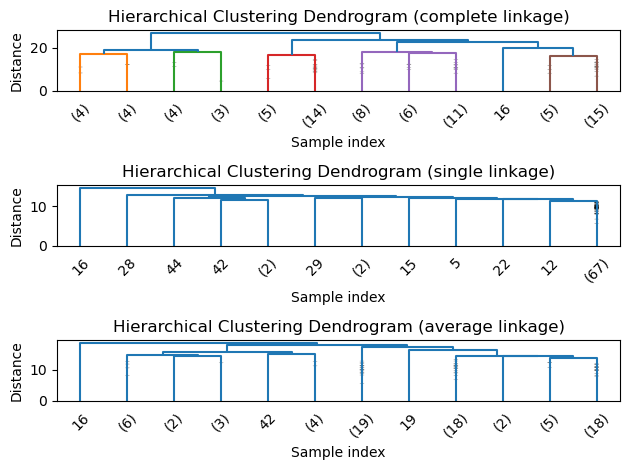

In [23]:

for i, method in enumerate(linkage_methods):
    plt.subplot(3, 1, i+1)
    dendrogram(cluster_trees[method], truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [24]:
# Setting a cutoff to get 4 clusters for each method
cluster_labels = {}
cutoff = 4  # Number of clusters

for method in linkage_methods:
    cluster_labels[method] = fcluster(cluster_trees[method], t=cutoff, criterion='maxclust')

# Creating a confusion table (or contingency table) for each method
confusion_tables = {}

for method in linkage_methods:
    confusion_tables[method] = pd.crosstab(index=bc_genes_df['PAM50 mRNA'], columns=cluster_labels[method], rownames=['True Label'], colnames=[f'Cluster ({method})'])

# Display the confusion tables
for method in linkage_methods:
    print(f"Confusion Table for {method} Linkage Method:")
    print(confusion_tables[method])
    print("\n")

Confusion Table for complete Linkage Method:
Cluster (complete)   1   2   3   4
True Label                        
Basal_like           0  18   1   0
HER2_enriched       11   0   0   2
Luminal_A            0   1  21   1
Luminal_B            4   0   3  18


Confusion Table for single Linkage Method:
Cluster (single)  1   2  3  4
True Label                   
Basal_like        0  19  0  0
HER2_enriched     4   7  1  1
Luminal_A         0  23  0  0
Luminal_B         0  25  0  0


Confusion Table for average Linkage Method:
Cluster (average)   1   2   3  4
True Label                      
Basal_like          0  18   1  0
HER2_enriched      11   0   1  1
Luminal_A           0   1  22  0
Luminal_B           5   0  20  0




- Complete Linkage: This method tends to create more balanced clusters compared to the other methods. However, it still struggles to perfectly segregate the true labels into separate clusters.
- Single Linkage: This method has resulted in a large majority of samples being clustered into one group (cluster 2). This indicates a tendency for chaining, a common issue in single linkage clustering where clusters can be elongated and less compact.
- Average Linkage: This method seems to perform a bit better than single linkage in terms of balancing cluster sizes and somewhat aligning with the true labels, but it still merges several true labels into single clusters.

Based on the results. The clustering result with the complete link recovers the 4 clusters well. However, the single link function does a poor job since it mixes the clusters. The average link discovers 3 clusters but puts Luminal A and luminal B into 1 cluster